In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load
df = pd.read_parquet('../data/raw/player_gamelogs_2023-24_sample.parquet')

In [3]:
# Parse date
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df = df.sort_values(['PLAYER_ID', 'GAME_DATE'])

In [4]:
# Basic stats
print(df.describe())
print(df[['PTS', 'REB', 'AST']].describe())

          Player_ID                      GAME_DATE          MIN          FGM  \
count  3.003000e+03                           3003  3003.000000  3003.000000   
mean   1.158814e+06  2024-01-17 00:41:14.325674240    32.458541     7.697636   
min    2.011420e+05            2023-10-24 00:00:00     1.000000     0.000000   
25%    2.035070e+05            2023-12-06 00:00:00    29.000000     5.000000   
50%    1.628389e+06            2024-01-16 00:00:00    34.000000     7.000000   
75%    1.629673e+06            2024-03-01 00:00:00    37.000000    10.000000   
max    1.641706e+06            2024-04-14 00:00:00    54.000000    25.000000   
std    6.710451e+05                            NaN     6.541101     3.595256   

               FGA       FG_PCT         FG3M         FG3A      FG3_PCT  \
count  3003.000000  3003.000000  3003.000000  3003.000000  3003.000000   
mean     15.698968     0.490276     1.937063     5.191142     0.318507   
min       1.000000     0.000000     0.000000     0.000000

In [5]:
# Check for DNP games (may want to filter these later)
dnp_games = df[df['MIN'] == 0]
print(f"DNP games: {len(dnp_games)} ({len(dnp_games)/len(df)*100:.1f}%)")

DNP games: 0 (0.0%)


In [6]:
# The NBA API's PlayerGameLog endpoint only returns games where the player actually played.

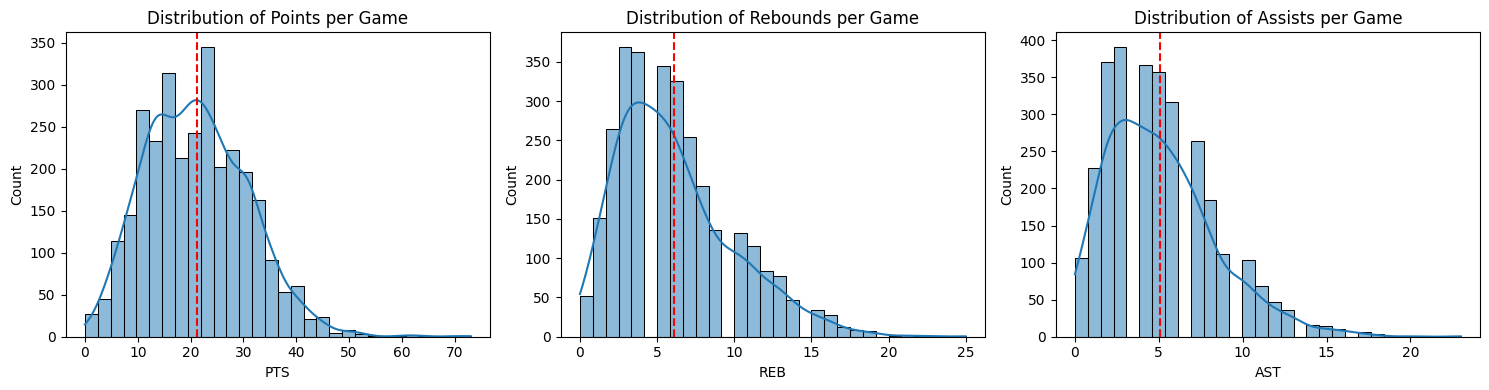

In [8]:
# Visualization 1: Distributions of target variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['PTS'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Points per Game')
axes[0].axvline(df['PTS'].mean(), color='red', linestyle='--', label='Mean')

sns.histplot(df['REB'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Rebounds per Game')
axes[1].axvline(df['REB'].mean(), color='red', linestyle='--', label='Mean')

sns.histplot(df['AST'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Assists per Game')
axes[2].axvline(df['AST'].mean(), color='red', linestyle='--', label='Mean')

plt.tight_layout()
plt.savefig('../reports/figures/target_distributions.png', dpi=150)
plt.show()

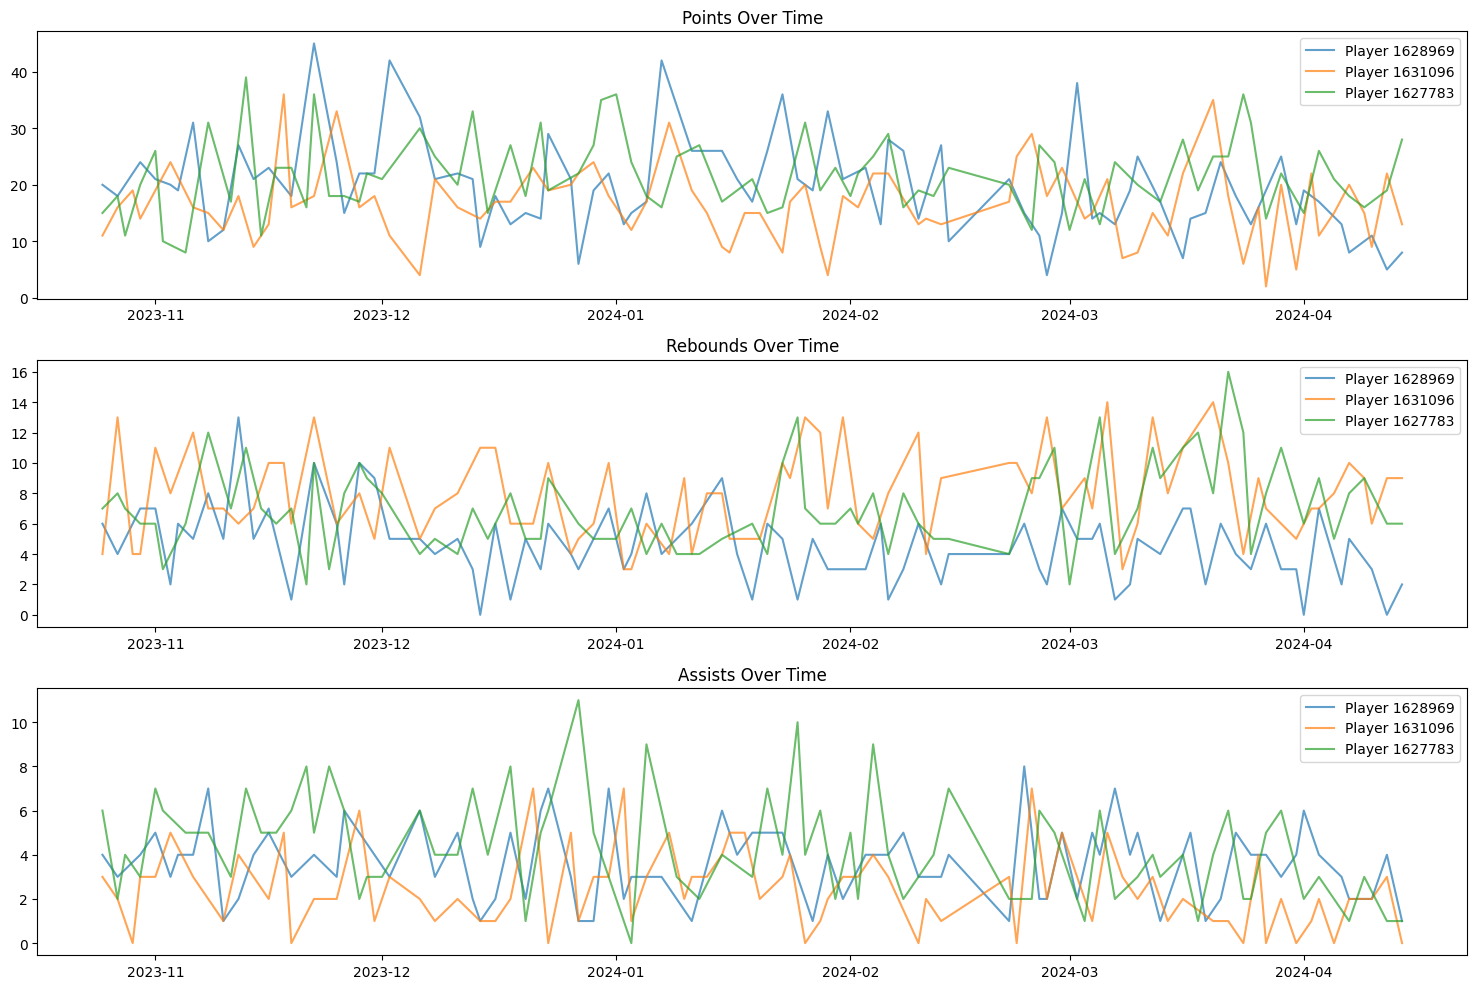

In [9]:
# Visualization 2: Time series for sample players
sample_players = df.groupby('PLAYER_ID').size().nlargest(5).index

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

for player_id in sample_players[:3]:
    player_data = df[df['PLAYER_ID'] == player_id].sort_values('GAME_DATE')

    axes[0].plot(player_data['GAME_DATE'], player_data['PTS'],
                 label=f'Player {player_id}', alpha=0.7)
    axes[1].plot(player_data['GAME_DATE'], player_data['REB'],
                 label=f'Player {player_id}', alpha=0.7)
    axes[2].plot(player_data['GAME_DATE'], player_data['AST'],
                 label=f'Player {player_id}', alpha=0.7)

axes[0].set_title('Points Over Time')
axes[0].legend()
axes[1].set_title('Rebounds Over Time')
axes[1].legend()
axes[2].set_title('Assists Over Time')
axes[2].legend()

plt.tight_layout()
plt.savefig('../reports/figures/time_series_sample.png', dpi=150)
plt.show()

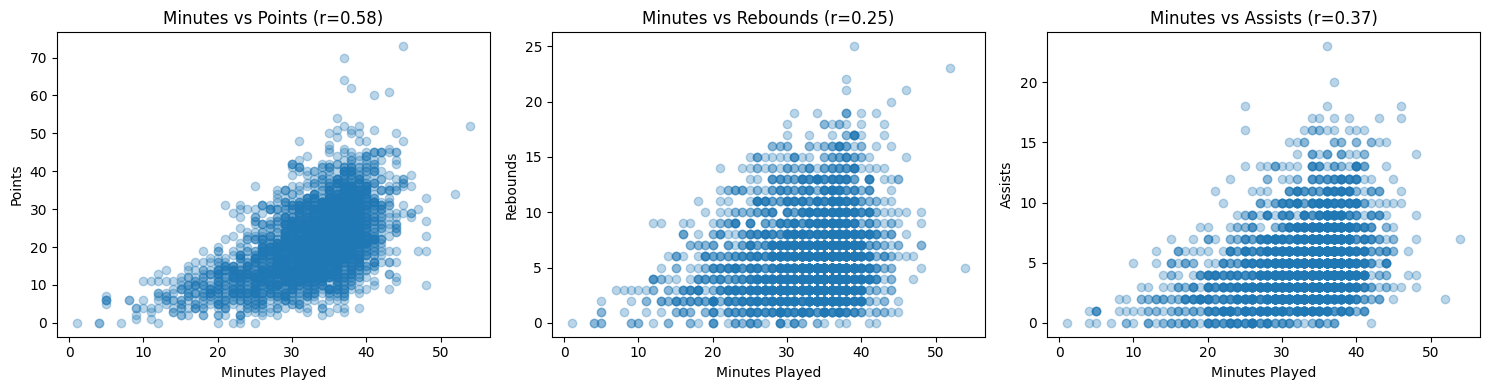

In [10]:
# Visualization 3: Correlation between minutes and performance
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df['MIN'], df['PTS'], alpha=0.3)
axes[0].set_xlabel('Minutes Played')
axes[0].set_ylabel('Points')
axes[0].set_title(f'Minutes vs Points (r={df[["MIN", "PTS"]].corr().iloc[0,1]:.2f})')

axes[1].scatter(df['MIN'], df['REB'], alpha=0.3)
axes[1].set_xlabel('Minutes Played')
axes[1].set_ylabel('Rebounds')
axes[1].set_title(f'Minutes vs Rebounds (r={df[["MIN", "REB"]].corr().iloc[0,1]:.2f})')

axes[2].scatter(df['MIN'], df['AST'], alpha=0.3)
axes[2].set_xlabel('Minutes Played')
axes[2].set_ylabel('Assists')
axes[2].set_title(f'Minutes vs Assists (r={df[["MIN", "AST"]].corr().iloc[0,1]:.2f})')

plt.tight_layout()
plt.savefig('../reports/figures/minutes_correlation.png', dpi=150)
plt.show()